In [1]:
from IPython.display import Image
from os import chdir
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import tensorflow as tf

2021-12-25 20:35:44.746303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-25 20:35:44.746337: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


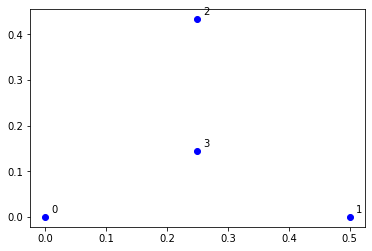

In [2]:
mx = np.asarray([
    [0,0],
    [0.5, 0],
    [0.25, 0.5 * np.sqrt(3)/2 ],
    [ 0.75/3, (0.5 * np.sqrt(3)/2)/3 ],
])

#mx = np.random.rand(100,2)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(mx[:,0], mx[:,1], color = "blue")
for i, p in enumerate(mx):
    ax.text(*tuple(p + .01), str(i))

In [3]:
mx = tf.convert_to_tensor(mx, dtype=tf.float32)

ALPHA = True
RIPS = not ALPHA

if ALPHA:
    skeleton = gd.AlphaComplex(
        #distance_matrix = result,
        points = mx,
        #max_edge_length = np.ceil(result.max())
    )
    st = skeleton.create_simplex_tree()
elif RIPS:
    t1 = tf.reshape(mx, (1,mx.shape[0],mx.shape[1]))
    t2 = tf.reshape(mx, (mx.shape[0],1,mx.shape[1]))
    result = tf.norm(t1-t2, ord='euclidean', axis=2,)
    result = result.numpy()
    skeleton = gd.RipsComplex(
        distance_matrix = result,
        max_edge_length = np.ceil(result.max())
    )
    st = skeleton.create_simplex_tree(max_dimension = 3)

2021-12-25 20:35:47.370786: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-25 20:35:47.370829: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-25 20:35:47.370854: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UX305FA): /proc/driver/nvidia/version does not exist
2021-12-25 20:35:47.371657: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
distance_to_centroid = (np.sin(np.pi/3)/3) # from origin

distance_to_centroid

0.28867513459481287

In [5]:
if ALPHA:
    for s in sorted(st.get_filtration(), key = lambda t : t[1]):
        print("radius = {:.5f}".format(np.sqrt(s[1])), "\tsimplex =", s[0])
elif RIPS:
    for s in sorted(st.get_filtration(), key = lambda t : t[1]):
        print("radius = {:.5f}".format(s[1]), "\tsimplex =", s[0])

radius = 0.00000 	simplex = [0]
radius = 0.00000 	simplex = [1]
radius = 0.00000 	simplex = [2]
radius = 0.00000 	simplex = [3]
radius = 0.14434 	simplex = [2, 3]
radius = 0.14434 	simplex = [0, 3]
radius = 0.14434 	simplex = [1, 3]
radius = 0.28868 	simplex = [0, 2]
radius = 0.28868 	simplex = [1, 2]
radius = 0.28868 	simplex = [0, 2, 3]
radius = 0.28868 	simplex = [1, 2, 3]
radius = 0.28868 	simplex = [0, 1]
radius = 0.28868 	simplex = [0, 1, 3]


usetex mode requires TeX.


<AxesSubplot:title={'center':'Persistence barcode'}>

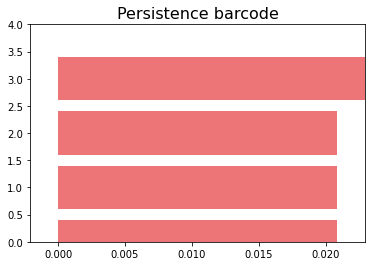

In [6]:
gd.plot_persistence_barcode(st.persistence())